In [3]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [4]:
raw_df = pd.read_csv("Raw-Data-HR-Employee-Attrition.csv")
raw_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [27]:


genderpr = pd.DataFrame(raw_df.groupby(['Gender', 'PerformanceRating'])['DailyRate'].count())
genderpr.reset_index(inplace=True)
genderpr.columns = ['gender', 'rating', 'count']
genderpr



,gender,rating,count
0,Female,3,494
1,Female,4,94
2,Male,3,750
3,Male,4,132


In [28]:
# Confirming Rating Amounts within the DataSet
raw_df.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [29]:
# Creating 3 lists of 2 items
labels = genderpr.rating.unique()
male_count = genderpr[genderpr.gender == 'Male']['count']
female_count = genderpr[genderpr.gender == 'Female']['count']


<IPython.core.display.Javascript object>


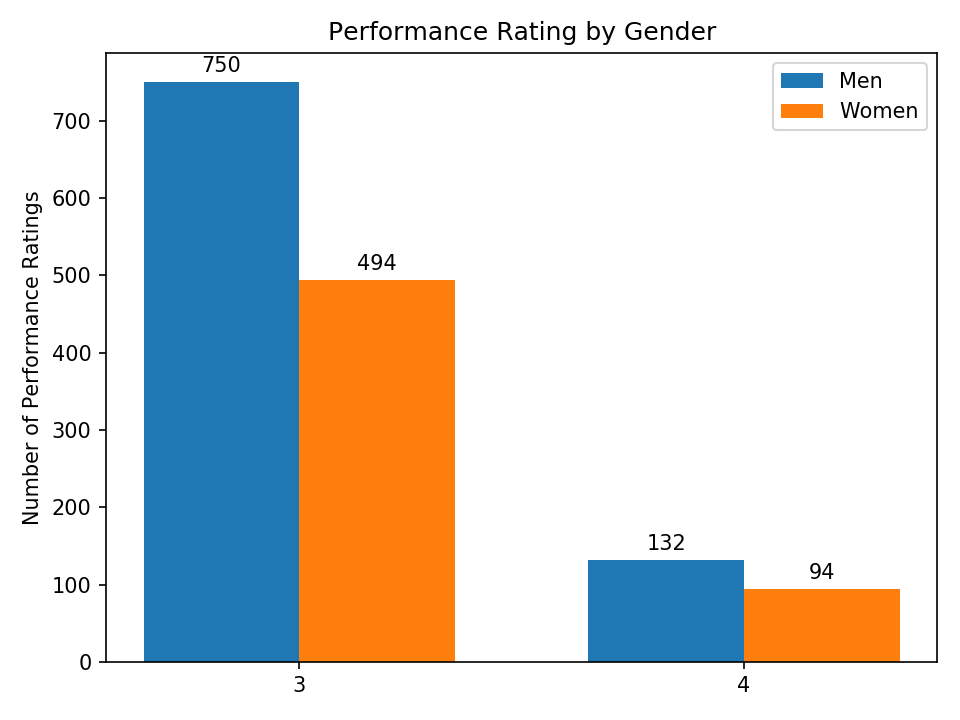

In [30]:
#Code Direction Provided From Matplotlib Documentation 
#https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

x = np.arange(len(labels))  # the label performance rating
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label='Men')
rects2 = ax.bar(x + width/2, female_count, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Performance Ratings')
ax.set_title('Performance Rating by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
#! dir

In [17]:
#Grabbing columns for Referance Purposes
raw_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [20]:
#Display an overview of the Department column
raw_df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [21]:
#Display an overview of the EducationField column
raw_df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [22]:
department_sort = pd.DataFrame(raw_df.groupby(['Department'])['Attrition'].count())
department_sort.reset_index(inplace=True)
department_sort.head()




,Department,Attrition
0,Human Resources,63
1,Research & Development,961
2,Sales,446


In [23]:
department_sort1 = pd.DataFrame(raw_df.groupby(['EducationField'])['Attrition'].count())
department_sort1.reset_index(inplace=True)
department_sort1.head(6)

,EducationField,Attrition
0,Human Resources,27
1,Life Sciences,606
2,Marketing,159
3,Medical,464
4,Other,82
5,Technical Degree,132




# Determining how many employees were affected by attrition



<IPython.core.display.Javascript object>


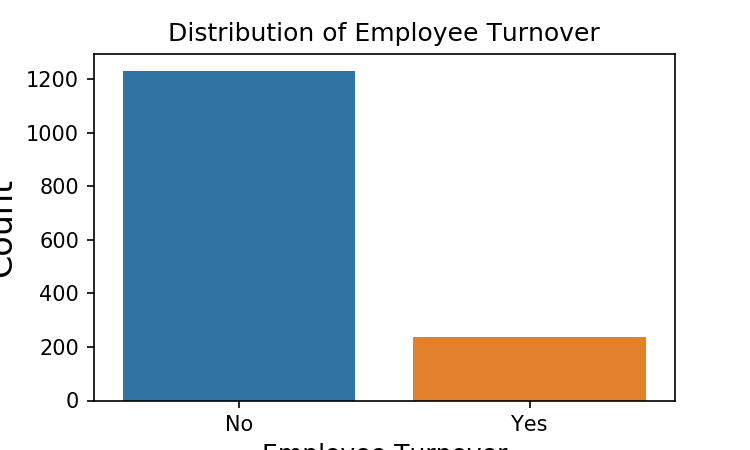

Text(0, 0.5, 'Count')

In [5]:
plt.figure(figsize=(5,3))
Attrition=raw_df.Attrition.value_counts()

sb.barplot(x=Attrition.index ,y=Attrition.values)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=12)
plt.ylabel('Count', fontsize=16)

# To further determine what department was affected most by attrition

In [7]:
#Determining the 'Yes' & 'No' tally from the Department column
dept_field = pd.DataFrame(raw_df.groupby(['Department', 'Attrition'])['DailyRate'].count())
dept_field.reset_index(inplace=True)
dept_field.columns = ['dept', 'retrenched', 'count']
dept_field

,dept,retrenched,count
0,Human Resources,No,51
1,Human Resources,Yes,12
2,Research & Development,No,828
3,Research & Development,Yes,133
4,Sales,No,354
5,Sales,Yes,92


In [8]:
#Moving forward to creating a plot for the tally:
# Creating 4 lists of 3 items

labels = dept_field.retrenched.unique()

hrs_count = dept_field[dept_field.dept == 'Human Resources']['count']
rd_count = dept_field[dept_field.dept == 'Research & Development']['count']
sls_count = dept_field[dept_field.dept == 'Sales']['count']




<IPython.core.display.Javascript object>


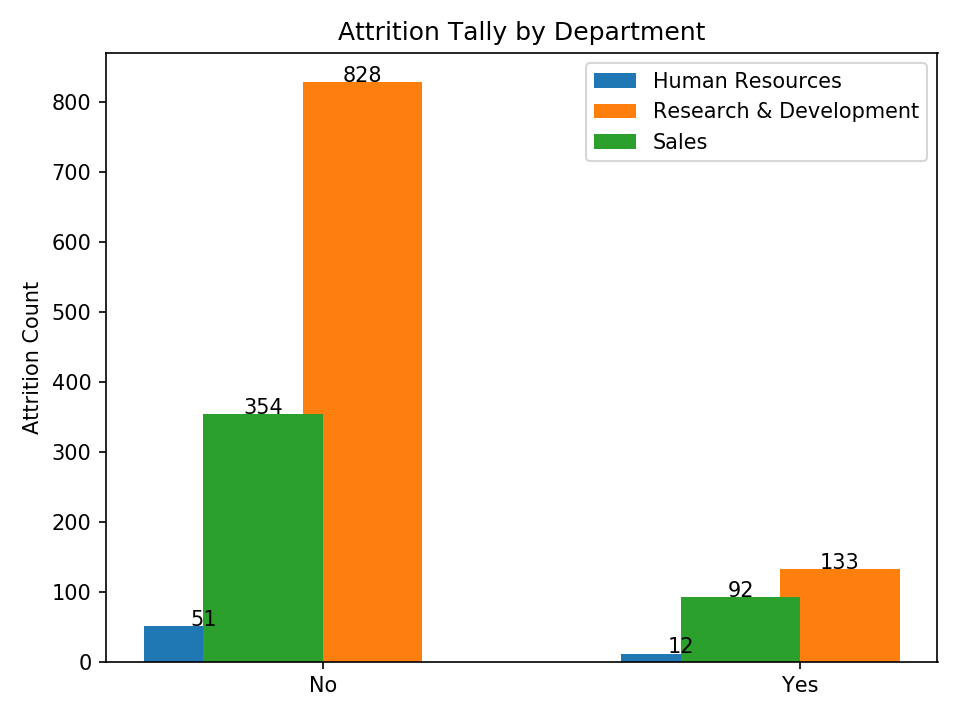

In [9]:
#Source code from Matplotlib Documentation 

#labels

x = np.arange(len(labels))  

#bar width

width = 0.25  

#plot assignment

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/1, hrs_count, width, label='Human Resources')
rects2 = ax.bar(x + width/3, rd_count, width, label='Research & Development')
rects3 = ax.bar(x - width/2, sls_count, width, label='Sales')

# Assigning texts for labels, title and custom x-axis tick labels:
ax.set_ylabel('Attrition Count')
ax.set_title('Attrition Tally by Department')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height, ), xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


# To further determine 'Yes' & 'No' tally in the EducationField column 

In [11]:
#Determining the 'Yes' & 'No' tally from the 'EducationField' column:

edu_field = pd.DataFrame(raw_df.groupby(['EducationField', 'Attrition'])['DailyRate'].count())
edu_field.reset_index(inplace=True)
edu_field.columns = ['education_field', 'retrenched', 'count']
edu_field


,education_field,retrenched,count
0,Human Resources,No,20
1,Human Resources,Yes,7
2,Life Sciences,No,517
3,Life Sciences,Yes,89
4,Marketing,No,124
5,Marketing,Yes,35
6,Medical,No,401
7,Medical,Yes,63
8,Other,No,71
9,Other,Yes,11


In [12]:
#Renaming the 'Yes' & 'No' terms:
edu_field['retrenched'] = edu_field['retrenched'].replace({'No':'Retained', 'Yes': 'Released'})
edu_field

,education_field,retrenched,count
0,Human Resources,Retained,20
1,Human Resources,Released,7
2,Life Sciences,Retained,517
3,Life Sciences,Released,89
4,Marketing,Retained,124
5,Marketing,Released,35
6,Medical,Retained,401
7,Medical,Released,63
8,Other,Retained,71
9,Other,Released,11


In [13]:
# Confirming Attrition Tally within the DataSet
raw_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
# Creating 7 lists of 6 items

labels = edu_field.retrenched.unique()

hr_count = edu_field[edu_field.education_field == 'Human Resources']['count']
lifsci_count = edu_field[edu_field.education_field == 'Life Sciences']['count']
mktg_count = edu_field[edu_field.education_field == 'Marketing']['count']
med_count = edu_field[edu_field.education_field == 'Medical']['count']
other_count = edu_field[edu_field.education_field == 'Other']['count']
tech_count = edu_field[edu_field.education_field == 'Technical Degree']['count']





<IPython.core.display.Javascript object>


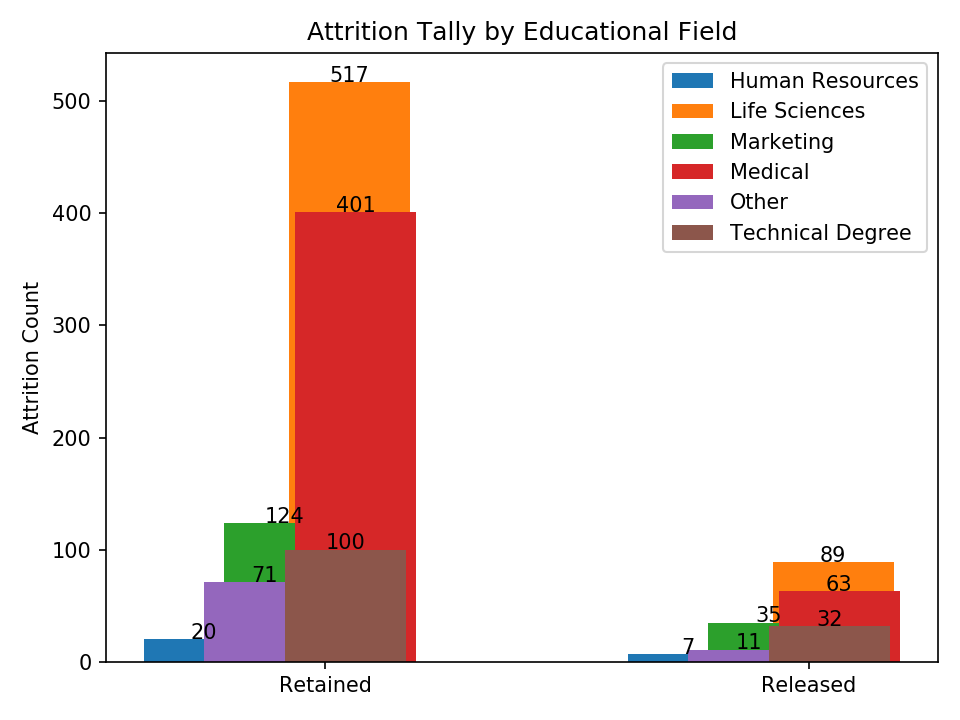

In [15]:
#Sourcecode from Matplotlib Documentation 


x = np.arange(len(labels))  

#bar width
width = 0.25  

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/1, hr_count, width, label='Human Resources')
rects2 = ax.bar(x + width/5, lifsci_count, width, label='Life Sciences')
rects3 = ax.bar(x - width/3, mktg_count, width, label='Marketing')
rects4 = ax.bar(x + width/4, med_count, width, label='Medical')
rects5 = ax.bar(x - width/2, other_count, width, label='Other')
rects6 = ax.bar(x + width/6, tech_count, width, label='Technical Degree')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Attrition Count')
ax.set_title('Attrition Tally by Educational Field')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.show()

In [18]:
raw_df['Attrition'] = raw_df['Attrition'].replace({'No':'Retained', 'Yes': 'Released'})
raw_df['Attrition'].value_counts()

Retained    1233
Released     237
Name: Attrition, dtype: int64

In [19]:
#raw_df["Attrition? (Released)"] = ""
#raw_df["Attrition? (Retained)"] = ""
raw_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Released,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,Retained,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Released,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Retained,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,Retained,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Further plots to see more relashionships

In [38]:
BarPlot_columns=['JobRole', 'YearsInCurrentRole']

In [39]:
#Method the perform Bar plots
def Bar_plots(var):
    col=pd.crosstab(raw_df[var],raw_df.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(6,3))
    plt.xticks(rotation=90)

<IPython.core.display.Javascript object>


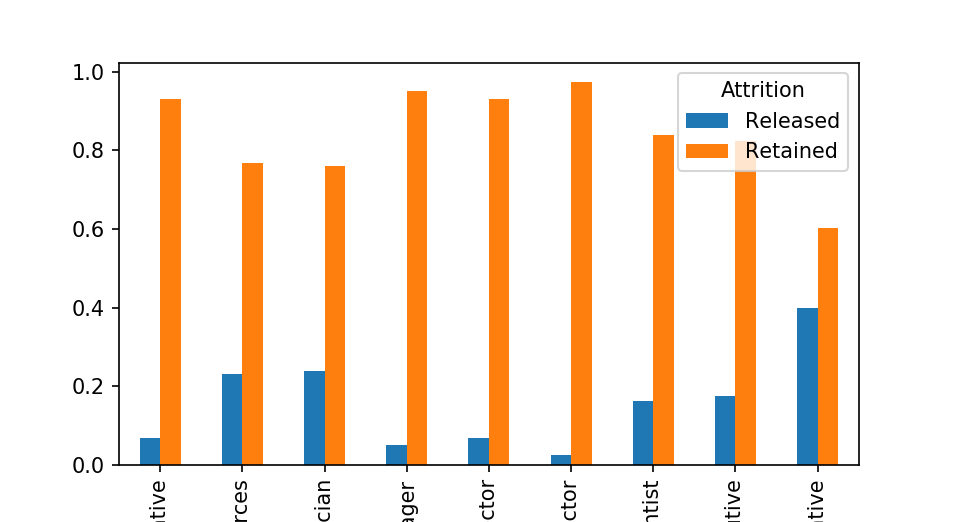

<IPython.core.display.Javascript object>


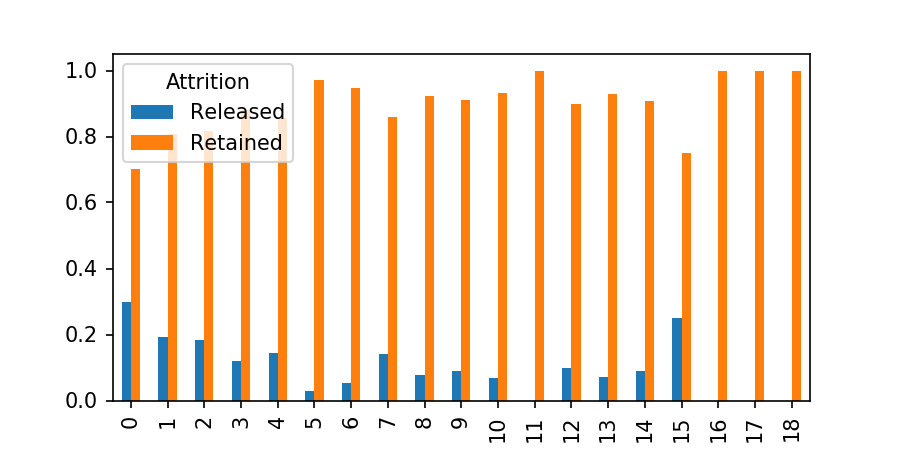

In [40]:
for col in BarPlot_columns:
    Bar_plots(col)

# Observations

### Fig. 2 shows that more people in the Research & Development department were affected by attrition.

### Result from further analysis in fig. 3 reveals that employees with a Life Sciences education were affected most by the attrition. Least affected had a Human Resources education.

### Fig. 5 reveals that more Sales Reprensentatives were affected by attrition than by any other Job Role.

### Fig. 6 shows more people with less than 1 year at the company were affected by attrition, followed closely by people with 14 -15 years at the company.
